In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset

hotel_data = pd.read_csv("hotel_bookings.csv")

# Display the first few rows and summary of the dataset
hotel_data_head = hotel_data.head()
hotel_data_info = hotel_data.info()
hotel_data_description = hotel_data.describe(include='all')

hotel_data_head, hotel_data_info, hotel_data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
 0  Resort Hotel            0        342               2015               July   
 1  Resort Hotel            0        737               2015               July   
 2  Resort Hotel            0          7               2015               July   
 3  Resort Hotel            0         13               2015               July   
 4  Resort Hotel            0         14               2015               July   
 
    arrival_date_week_number  arrival_date_day_of_month  \
 0                        27                          1   
 1                        27                          1   
 2                        27                          1   
 3                        27                          1   
 4                        27                          1   
 
    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
 0                        0                     0       2  ...    No D

In [5]:
# Analyze cancellation patterns
cancellation_counts = hotel_data['is_canceled'].value_counts(normalize=True)

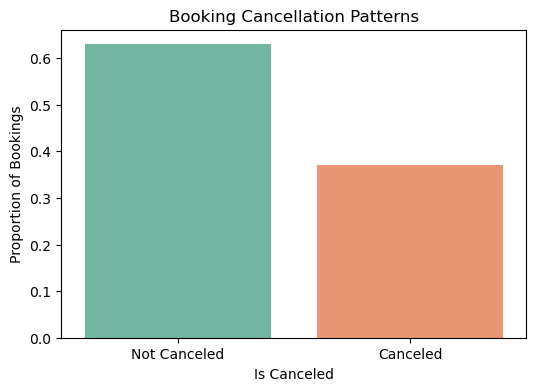

In [6]:
# Plot cancellation pattern
plt.figure(figsize=(6, 4))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette='Set2')
plt.title('Booking Cancellation Patterns')
plt.xlabel('Is Canceled')
plt.ylabel('Proportion of Bookings')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

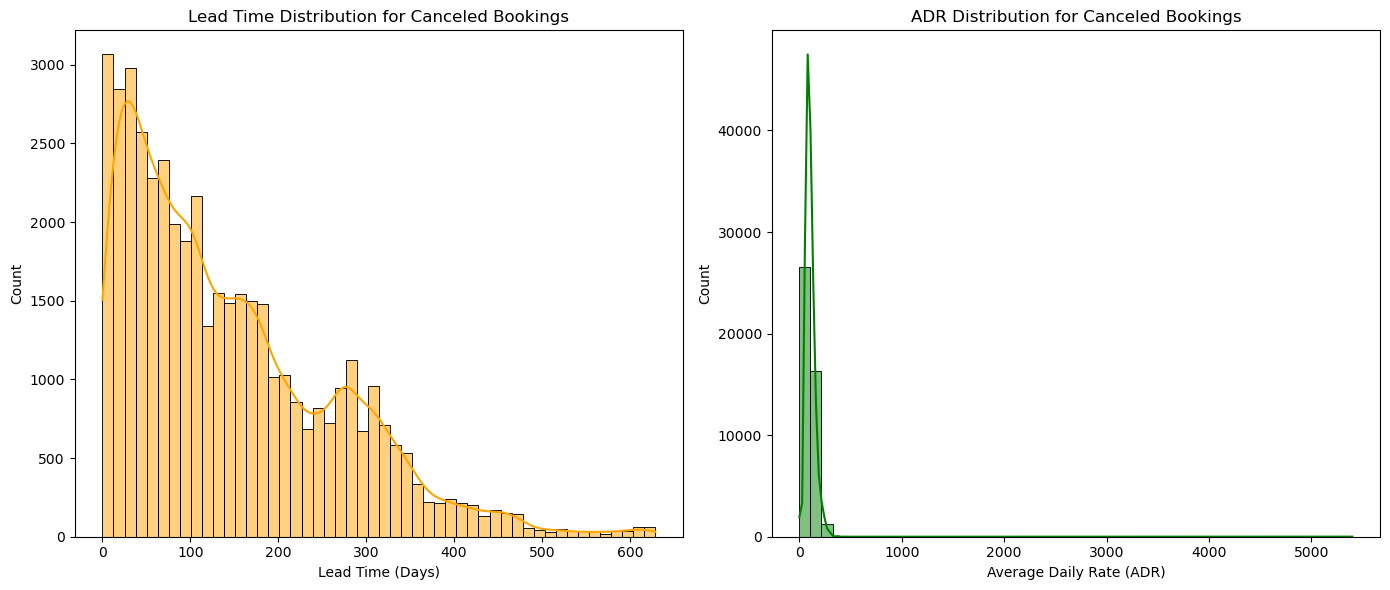

In [17]:
# Explore relationships between lead time, ADR, and booking cancellations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(hotel_data[hotel_data['is_canceled'] == 1]['lead_time'], color='orange', kde=True, bins=50)
plt.title('Lead Time Distribution for Canceled Bookings')
plt.xlabel('Lead Time (Days)')

plt.subplot(1, 2, 2)
sns.histplot(hotel_data[hotel_data['is_canceled'] == 1]['adr'], color='green', kde=True, bins=50)
plt.title('ADR Distribution for Canceled Bookings')
plt.xlabel('Average Daily Rate (ADR)')

plt.tight_layout()
plt.show()

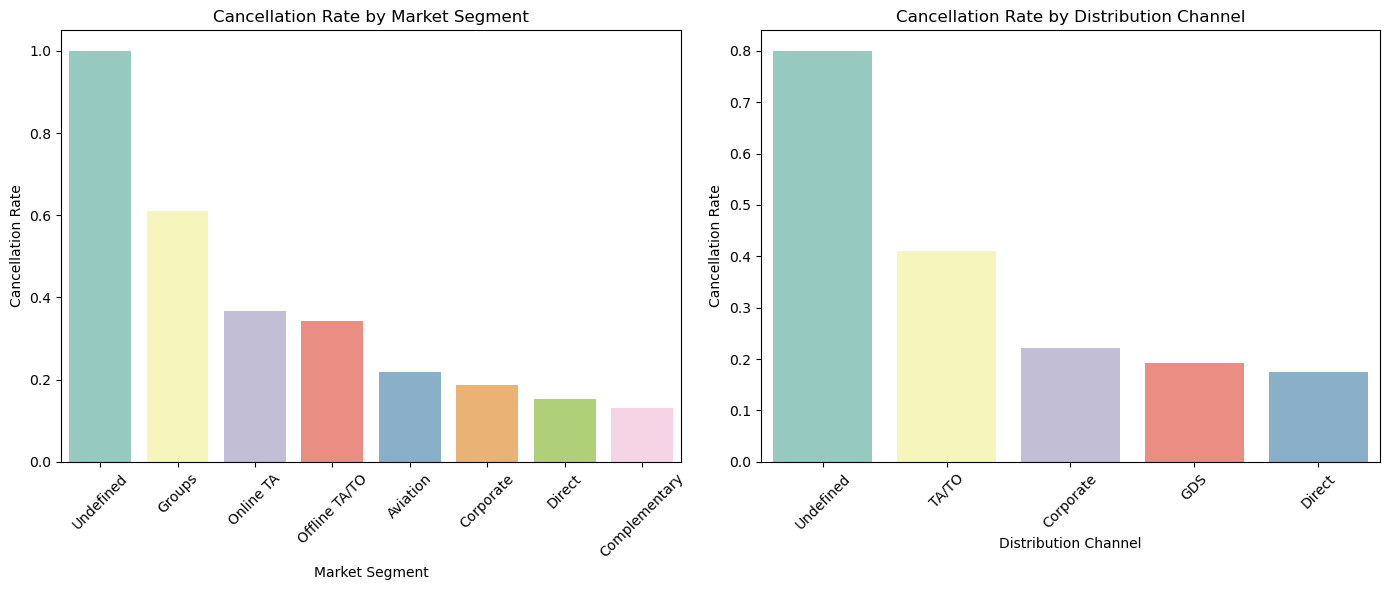

In [18]:
# Market Segment and Distribution Channel Analysis
cancellation_by_segment = hotel_data.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
cancellation_by_channel = hotel_data.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=cancellation_by_segment.index, y=cancellation_by_segment.values, palette='Set3')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=cancellation_by_channel.index, y=cancellation_by_channel.values, palette='Set3')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

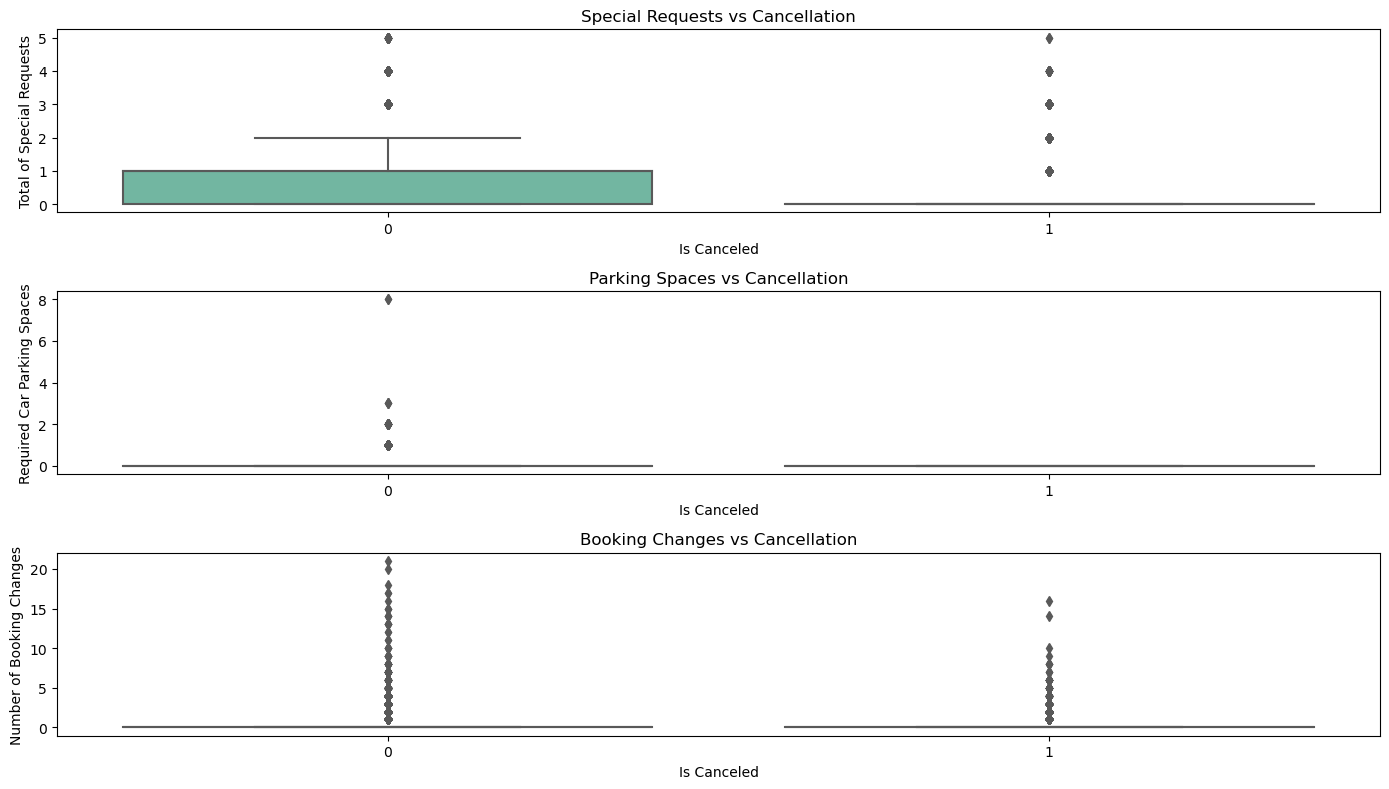

In [19]:
# Special Requests, Parking Spaces, and Booking Changes Analysis
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=hotel_data, palette='Set2')
plt.title('Special Requests vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Total of Special Requests')

plt.subplot(3, 1, 2)
sns.boxplot(x='is_canceled', y='required_car_parking_spaces', data=hotel_data, palette='Set2')
plt.title('Parking Spaces vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Required Car Parking Spaces')

plt.subplot(3, 1, 3)
sns.boxplot(x='is_canceled', y='booking_changes', data=hotel_data, palette='Set2')
plt.title('Booking Changes vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Number of Booking Changes')

plt.tight_layout()
plt.show()

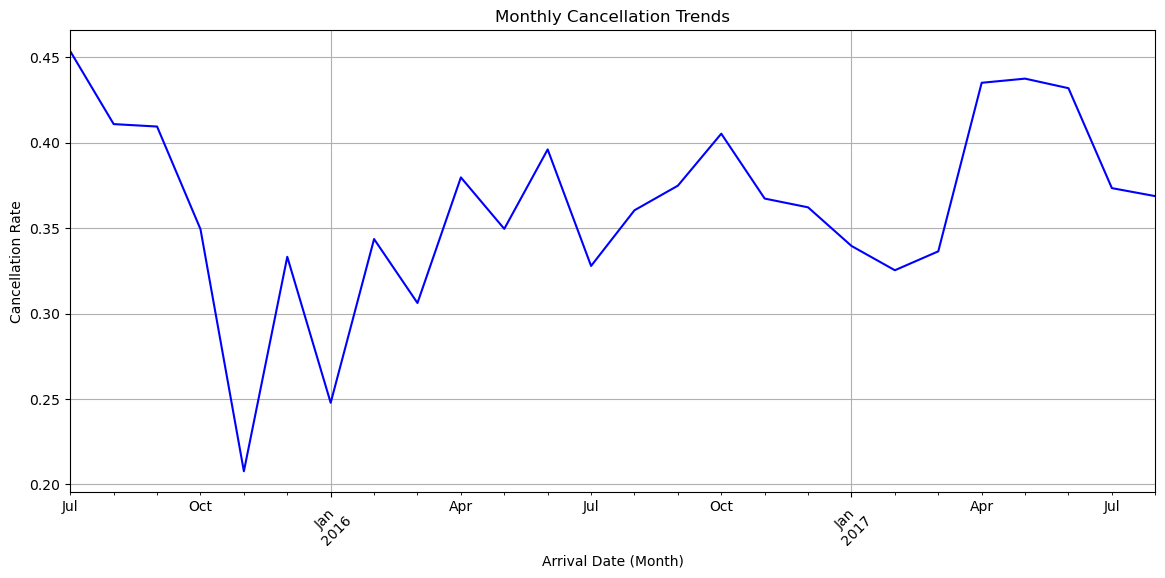

In [20]:
# Time-Based Analysis of Bookings and Cancellations
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'] + '-' + hotel_data['arrival_date_day_of_month'].astype(str))
cancellation_trends = hotel_data.groupby(hotel_data['arrival_date'].dt.to_period('M'))['is_canceled'].mean()

plt.figure(figsize=(14, 6))
cancellation_trends.plot(kind='line', color='blue')
plt.title('Monthly Cancellation Trends')
plt.xlabel('Arrival Date (Month)')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysis Results:



### Booking Cancellation Patterns:
    
    * Approximately 37% of the bookings are canceled, indicating a significant rate of cancellations.

### Relationships Between Lead Time, ADR, and Booking Cancellations:
   
*`Lead Time:` Bookings with a longer lead time tend to have a higher cancellation rate, possibly due to customers making changes to their plans over time.
   
*`ADR (Average Daily Rate):` Higher ADR bookings also show a tendency towards cancellations, which could be related to customers canceling expensive bookings if their plans change.

### Customer Behavior Based on Market Segment and Distribution Channel:
    
*`Market Segment:` The cancellation rate is highest in the "Groups" segment, followed by "Transient-Party". This suggests                          that group bookings are more prone to cancellations.

*`Distribution Channel:` The highest cancellation rates are observed in the "TA/TO" (Travel Agents/Tour Operators) distribution channel, indicating that bookings made through intermediaries have a higher likelihood of cancellation.

### Impact of Special Requests, Parking Space Requirements, and Booking Changes on Cancellations:
*`Special Requests:` Customers with more special requests tend to have a lower cancellation rate, possibly indicating more                            committed or detailed-oriented bookings.

*`Parking Spaces:` There is no strong correlation between parking space requirements and cancellations.

*`Booking Changes:` Bookings with changes made to them tend to have higher cancellation rates, suggesting that any modification to the booking may increase the risk of cancellation.

### Time-Based Analysis of Bookings and Cancellations:
    *The cancellation rate shows some seasonal trends, with certain months exhibiting higher cancellation rates. This could be due to factors like seasonal demand, holidays, or events.

## Conclusion:

* The data reveals significant cancellation rates, with trends linked to longer lead times, higher ADRs, and specific market segments or distribution channels. Customers who make changes to their bookings are also more likely to cancel.

*Understanding these patterns can help in devising strategies to minimize cancellations, such as targeting specific segments with flexible booking policies or offering incentives for early bookings.